In [2]:
import numpy as np
import shared_functions as sf
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt

In the last notebook we generalised the formula to an arbitrary polynomials, that we could create, and put an abitrary polygon on this curve and calcuate its area, getting to power of the Meister formula. Again, let's pull our functions across into the new notebook.

At this point, its worth introducing and formalising some of data structures that we will be really helpful to us as go forward. There are four main data structures that we should be aware of which are a little different and we will start seeing them more as we go forward. The good news is that they are very straight forward, just pertaining to groups of objects and how we can classify them. The 4 structures are.

<b>List:</b> An ordered structure in which repetitions are allowed
<br/>
<i>Order allowed: </i> Yes
<br/><i>Repetiion allowed: </i> Yes
<br/> <i>Examples: </i> [3,4,5,6], [3, 3, 3, 3]


<b>Ordered set:</b> An ordered structure in which repetitions are not allowed
<br/>
<i>Order allowed: </i> Yes
<br/><i>Repetition allowed: </i> No
<br/> <i>Examples: </i> {3,4,5,6}, {6, 7, 8}


<b>Multi Set:</b> An unordered structure in which repetitions are allowed
<br/>
<i>Order allowed: </i> No
<br/><i>Repetition allowed: </i> Yes
<br/> <i>Examples: </i> [3 4 4 5], [6 5 6 7]


<b>Set:</b> An unordered structure in which repetitions are not allowed
<br/>
<i>Order allowed: </i> No
<br/><i>Repetition allowed: </i> No
<br/> <i>Examples: </i> {3 4 5 6}


To help you remember this, I think of list being at one end of the spectrum (order and repetitition) and set being at the other end (no order, no repetitition). Note also there is a notation convention here: [] means that repetitions are allowed, "," means that order is allowed.  


Finally, there is one more structure to be aware of, which is a variation on a list or ordered set, called a <b>Cyclic data structures</b>. Order is enforced and repetitions allowed where also cyclic rotation of the elements is allowed. Note the use of an the angle brackets for notation

$$  C=\langle [4,5,4,3,3] \rangle= \langle [5,4,3,3,4] \rangle=\langle [4,3,3,4,5] \rangle=\langle [3,3,4,5,4] \rangle=\langle [3,4,5,4,3] \rangle .$$

As we go forward, we will come across these structures in different situations so its handy to formalise nomenclature and now


<hr/>
So far we have been constructing triangles, quadrilaterals and polygons and exploring the signed area. But it's worth noting that we are constructing these things from a series of orientated sides, and each side has its own signed area. And this leads to the interesting extension of the notion of area, that we think of area in which we have structures such as triangles, quadrilaterals etc, but also we can also think of these sides as into paths (or edges) leading to other sides. We can visualise the idea like this: 

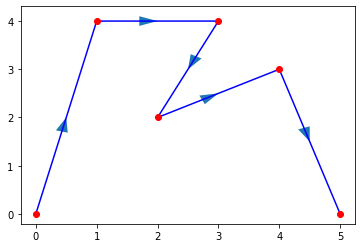

In [3]:
points_choice = np.array([[0,0], [1,4], [3,4], [2,2], [4,3], [5,0]])
x_coords = [e[0] for e in points_choice]
y_coords = [e[1] for e in points_choice]
plt.arrow(0, 0, .5, 2, shape='full', lw=0, length_includes_head=True, head_width=.2)
plt.arrow(1, 4, 1, 0, shape='full', lw=0, length_includes_head=True, head_width=.2)
plt.arrow(3, 4, -.5, -1, shape='full', lw=0, length_includes_head=True, head_width=.2)
plt.arrow(2, 2, 1, .5, shape='full', lw=0, length_includes_head=True, head_width=.2)
plt.arrow(4, 3, .5, -1.5, shape='full', lw=0, length_includes_head=True, head_width=.2)
plt.plot(x_coords, y_coords, 'b')
plt.plot(x_coords, y_coords, 'ro')

To explore this we will introduce some new geometrical objects: <b>Oriented Edges</b> and <b>Polygonal Splines</b>. 

An oriented edge is a <i>List</i> of affine points. It is functionally the same as an orientated side and can be treated the same in regard to signed area. So if we have means that for 2 general affine points, $A = [a, b]$ and $B = [c, d]$, we can construct orientated edges and calculate thier areas, and the properties we would expect will hold such as:  
$$s(\overrightarrow{AA})=\frac12(ab-ba)=0.$$ and $$s(\overrightarrow{BA})=\frac 12 (cb-ad)=-\frac 12 (ad-bc)=-s(\overrightarrow{AB})$$ 

In the same way a polygon can be seen as a group of orientated sides, an orientated polygonal spline (OPS) can be seen as a group of oreintated edges. For example if we have te following orientated edges, $\overrightarrow{AB},\overrightarrow{BC},\overrightarrow{CD},\overrightarrow{DD}$, and $\overrightarrow{DC}$, formed by the points $A, B, C$ and $D$, we can also form the orientated polygonal spline from these edges, and could write it as:  $\overrightarrow{ABCDDC}$. Notice the the point D repeats: these structures are best intuited as somethign like a directed acyclical graph, rather than a polygon, so the repetitiion of points is fine. Note this structure also has a cyclic version,  $\overleftrightarrow{ABCDDC}$ can be $\overrightarrow{AB},\overrightarrow{BC},\overrightarrow{CD},\overrightarrow{DD},\overrightarrow{DC},\overrightarrow{CA}$

It's also worth noting that you can think of the orientated edges in a COPS as unbounded: its just keeps on going around around. 

Before going, let's update our functions a little. When we have been using Meister's formula for the area of polygons, we have been assuming that it is cyclic, but the signed area of an OPS is actually different to a COPS. Let's amend the code by adding an <code>is_cyclic</code> argument to explcitly dealing whether we are are evaluating and cyclical orientated polygonal spline or an orientated polygonal spline, and work through and example 

In [4]:
def compute_cross_product_from_two_points(points_list):
    c = points_list[0][0] * points_list[1][1] - points_list[0][1] * points_list[1][0]
    return(c)

def compute_signed_area_from_two_points(points_list):
    c = compute_cross_product_from_two_points(points_list)
    signed_area = c / 2
    return(signed_area)

def compute_signed_area_using_meisters_formula(points_list, is_cyclic):

    total_signed_area = 0
    for each_point in range(len(points_list) - 1):
        signed_area = compute_signed_area_of_triangle_from_two_points([points_list[each_point], points_list[each_point + 1]])
        #print("Signed area of oriented side ", str(each_point + 1), ": ", points_list[each_point], points_list[each_point + 1], ": ", signed_area)
        total_signed_area = total_signed_area + signed_area
    
    if is_cyclic:
        final_signed_area = compute_signed_area_of_triangle_from_two_points([points_list[-1], points_list[0]])
    #print("Signed area of oriented side ", str(len(points_list)), ": ", points_list[-1], points_list[0], ": ", final_signed_area)
        total_signed_area = total_signed_area + final_signed_area
        
    #print("Total signed area is: ", total_signed_area)
    
    return(total_signed_area)

Let's construct some orientated edges and calculate the area. Note things have not changed at all to orientated sides. We will mix things up to and cyclic and non-cyclic examples:

In [5]:
A = np.array([3, -1])
B = np.array([0, 2])
C = np.array([-1, 1])
D = np.array([0, -1])

print(compute_signed_area_from_two_points([A, B]))
print(compute_signed_area_from_two_points([C, D]))
print(compute_signed_area_using_meisters_formula([A, B, C, D], is_cyclic = True))
print(compute_signed_area_using_meisters_formula([A, B, C, B, B, C], is_cyclic=False))
print(compute_signed_area_using_meisters_formula([A, B, C, B, B, C], is_cyclic = True))


3.0
0.5


NameError: name 'compute_signed_area_of_triangle_from_two_points' is not defined

All the usual things we would expect still hold in this world, but we can take a slighly different view of things. We can still create points with certain types of paramaterisations and calculate their signed area. 

As an example, let's consider 100 points based on a parameterisation of the parameterisation of a parabola. We can still add a subset for their area 

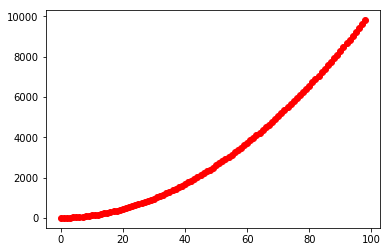

In [99]:
v = [np.array([i, (i + 1)^2]) for i in range(99)]
points_choice = v
x_coords = [e[0] for e in points_choice]
y_coords = [e[1] for e in points_choice]
plt.plot(x_coords, y_coords, 'ro')

And compute the signed area of some subsets of those areas

In [101]:
print(compute_signed_area_using_meisters_formula([v[0], v[1], v[2], v[3], v[4]], is_cyclic=False))
print(compute_signed_area_using_meisters_formula([v[9], v[10], v[11], v[12]], is_cyclic=False))

8.0
164.5


Explicitly defining some points, shows us some interesting of traingle decomponsition formula that tells us the signed area of a cyclic oreintated trinagle, $s(\overleftrightarrow{ABC})$ is equivalent to $s(\overleftrightarrow{ABP})+s(\overleftrightarrow{BCP})+s(\overleftrightarrow{CAP})$ for orientated trinagles constructed from affine points $A, B$ and $C$. Let's check this be creating some points, and see if this holds

In [102]:
a, b, c, d, e, f, p1, p2 = sp.symbols('a, b, c, d, e, f, p1, p2')

In [105]:
A = np.array([a, b])
B = np.array([c, d])
C = np.array([e, f])
P = np.array([p1, p2])


In [122]:
r1 = compute_signed_area_using_meisters_formula([A, B, C], is_cyclic=True)
show(r1)

-1/2*b*c + 1/2*a*d + 1/2*b*e - 1/2*d*e - 1/2*a*f + 1/2*c*f

In [123]:
r2 = compute_signed_area_using_meisters_formula([A, B, P], is_cyclic=True)
r3 = compute_signed_area_using_meisters_formula([B, C, P], is_cyclic=True)
r4 = compute_signed_area_using_meisters_formula([C, A, P], is_cyclic=True)
show(r2 + r3 + r4)

-1/2*b*c + 1/2*a*d + 1/2*b*e - 1/2*d*e - 1/2*a*f + 1/2*c*f

There are things of interest we can discover as well. We can also translate things as well, both orientated edges and splines. For example, if A and B are affine points, v is a vector